In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
import random
import numpy as np
%matplotlib inline

#### 256 sized image and masks

In [2]:
!ls ../data

npy_masks  org_data		  test_images  train_images
npy_train  sample_submission.csv  train.csv


In [3]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/sample_submission.csv')

In [4]:
train_df.head()

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN
3,0002cc93b.jpg_4,NaN
4,00031f466.jpg_1,NaN


In [5]:
train_df.shape

(50272, 2)

In [6]:
# Transform class to column
train_df['ImageId'], train_df['ClassId'] = zip(*train_df['ImageId_ClassId'].str.split('_'))
train_df['ClassId'] = train_df['ClassId'].astype(int)
train_df = train_df.pivot(index='ImageId',columns='ClassId',values='EncodedPixels')
train_df['defects'] = train_df.count(axis=1)
#train_df.reset_index()
train_df.head(10)

ClassId,1,2,3,4,defects
ImageId,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1
00031f466.jpg,NaN,NaN,NaN,NaN,0
000418bfc.jpg,NaN,NaN,NaN,NaN,0
000789191.jpg,NaN,NaN,NaN,NaN,0
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1
000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN,1
000f6bf48.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1
0014fce06.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN,1
001982b08.jpg,NaN,NaN,NaN,NaN,0


In [93]:
train_df.index.tolist()

['0002cc93b.jpg',
 '00031f466.jpg',
 '000418bfc.jpg',
 '000789191.jpg',
 '0007a71bf.jpg',
 '000a4bcdd.jpg',
 '000f6bf48.jpg',
 '0014fce06.jpg',
 '001982b08.jpg',
 '001d1b355.jpg',
 '001d3d093.jpg',
 '0025bde0c.jpg',
 '002af848d.jpg',
 '002e73b3c.jpg',
 '002fc4e19.jpg',
 '0030401a5.jpg',
 '003ac9d2a.jpg',
 '0046839bd.jpg',
 '005b92582.jpg',
 '005d86c25.jpg',
 '005da33cf.jpg',
 '005dbf0e0.jpg',
 '005f02e20.jpg',
 '005f19695.jpg',
 '006a4402e.jpg',
 '0074d81d0.jpg',
 '00762aa3b.jpg',
 '007f28bba.jpg',
 '008479d08.jpg',
 '008621629.jpg',
 '0088260da.jpg',
 '00894274f.jpg',
 '008b9acf5.jpg',
 '008d0f87b.jpg',
 '008ef3d74.jpg',
 '0095cd374.jpg',
 '009b12ccc.jpg',
 '00ac8372f.jpg',
 '00af2671f.jpg',
 '00b989e78.jpg',
 '00bc01bfe.jpg',
 '00bf8497a.jpg',
 '00c24a74c.jpg',
 '00c6060db.jpg',
 '00c88fed0.jpg',
 '00cdb56a0.jpg',
 '00d639396.jpg',
 '00d7ae946.jpg',
 '00dcb19f3.jpg',
 '00ded7837.jpg',
 '00e0398ad.jpg',
 '00ec97699.jpg',
 '00f1665e6.jpg',
 '00f68d337.jpg',
 '00f6e702c.jpg',
 '00f95222

In [82]:
train_df.head()

ClassId,1,2,3,4,defects,ImageId
ImageId,,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1,0002cc93b.jpg
00031f466.jpg,NaN,NaN,NaN,NaN,0,00031f466.jpg
000418bfc.jpg,NaN,NaN,NaN,NaN,0,000418bfc.jpg
000789191.jpg,NaN,NaN,NaN,NaN,0,000789191.jpg
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1,0007a71bf.jpg


In [7]:
# Presence of defects in each images
no_defects_num = np.sum(train_df['defects'] == 0)
defects_num = len(train_df) - no_defects_num
print("no_defect imgs \t:", no_defects_num)
print("defects imgs \t:", defects_num)

no_defect imgs 	: 5902
defects imgs 	: 6666


In [8]:
# Number of defects for each class
class_defects = len(train_df) - train_df.isnull().sum() # sum is default in axis=0
class_defects[:4]

ClassId
1     897
2     247
3    5150
4     801
dtype: int64

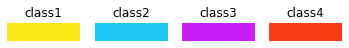

In [9]:
palet = [(250, 230, 20), (30, 200, 241), (200, 30, 250), (250,60,20)]

fig, ax = plt.subplots(1, 4, figsize=(6, 2))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(np.ones((10, 40, 3), dtype=np.uint8) * palet[i])
    ax[i].set_title("class{}".format(i+1))

plt.show()

In [10]:
def mask2rgba(mask):
    rgba_list = []
    for idx in range(4):    # idx: class id
        rgba = cv2.cvtColor(mask[:, :, idx], cv2.COLOR_GRAY2RGBA)
        rgba[:, :, :3] = rgba[:, :, :3] /255 * palet[idx]
        rgba_list.append(rgba)
    return rgba_list

In [11]:
def make_mask(row_id):
    fname = train_df.iloc[row_id].name
    labels = train_df.iloc[row_id][:4]
    masks = np.zeros((256, 1600, 4), dtype=np.uint8)    # 4:class 1～4 (ch:0～3)

    for idx, label in enumerate(labels.values):
        if label is not np.nan:
            label = label.split(" ")
            positions = map(int, label[0::2])
            length = map(int, label[1::2])
            mask = np.zeros(256 * 1600, dtype=np.uint8)
            for pos, le in zip(positions, length):
                mask[pos:(pos + le)] = 255
            masks[:, :, idx] = mask.reshape(256, 1600, order='F')
    return fname, masks


In [12]:
name, mask = make_mask(4)
name, mask.shape, np.unique(mask, return_counts=True)

('0007a71bf.jpg',
 (256, 1600, 4),
 (array([  0, 255], dtype=uint8), array([1631503,    6897])))

In [13]:
256*1600

409600

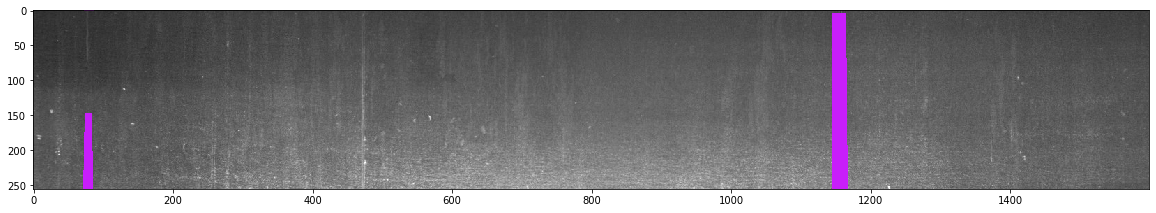

In [22]:
img = cv2.imread('../data/train_images/' + name)
plt.figure(figsize=(20, 10))
for ch in range(4):
    img[mask[:, :, ch] == 255] = palet[ch]
#     pass
plt.imshow(img)
plt.show()

In [23]:
cv_img = cv2.imread('../data/train_images/' + name)
np.all(cv_img[:, :, 0] == cv_img[:, :, 1]), np.all(cv_img[:, :, 1] == cv_img[:, :, 2]) # all Channels are same

(True, True)

In [25]:
def show_mask_image(row_id, contour = True):
    name, mask = make_mask(row_id)
    img = cv2.imread(os.path.join('../data/train_images/', name))

    if contour:
        for ch in range(4):
            contours, _ = cv2.findContours(mask[:, :, ch],
                            cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
            for i in range(0, len(contours)):
                cv2.polylines(img, contours[i], True, palet[ch], 2)
    else:
        for ch in range(4):
            img[mask[:,:,ch]==255] = palet[ch]
        
    fig, ax = plt.subplots(figsize=(7,7))
    ax.set_title(name)
    ax.imshow(img)
    ax.axis('off')
    plt.show()

In [26]:
idx_class_1 = list(filter(lambda r:not pd.isna(train_df.iloc[r,0]), range(len(train_df))))
idx_class_2 = list(filter(lambda r:not pd.isna(train_df.iloc[r,1]), range(len(train_df))))
idx_class_3 = list(filter(lambda r:not pd.isna(train_df.iloc[r,2]), range(len(train_df))))
idx_class_4 = list(filter(lambda r:not pd.isna(train_df.iloc[r,3]), range(len(train_df))))
# Nouber of defects class
idx_no_defect = list(filter(lambda r:train_df.iloc[r,4] == 0, range(len(train_df))))
idx_1_defect = list(filter(lambda r:train_df.iloc[r,4] == 1, range(len(train_df))))
idx_class_multi = list(filter(lambda r:train_df.iloc[r,4] >= 2, range(len(train_df))))


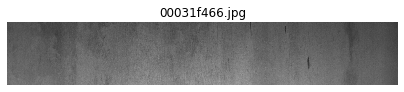

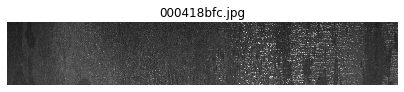

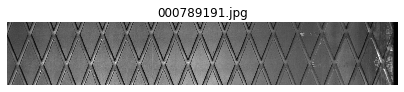

In [27]:
# no defect sumple
for idx in idx_no_defect[:3]:
    show_mask_image(idx)

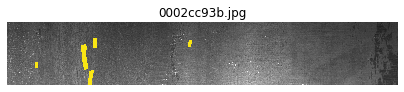

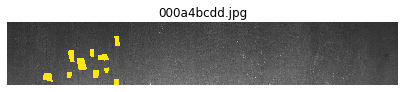

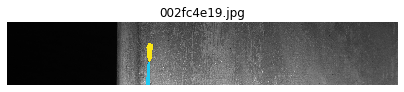

In [28]:
# class_1 defect sumple (Yellow)
for idx in idx_class_1[:3]:
    show_mask_image(idx, contour=False)

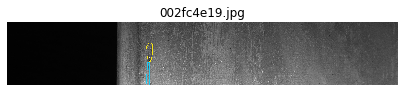

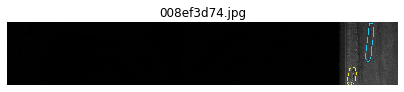

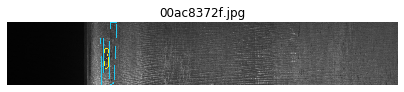

In [29]:
# class_2 defect sumple (lightblue)
for idx in idx_class_2[:3]:
    show_mask_image(idx, contour=True)

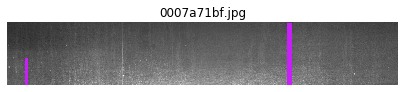

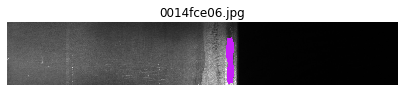

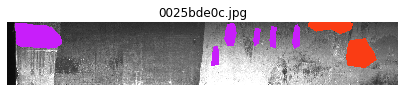

In [30]:
# class_3 defect sumple (purple)
for idx in idx_class_3[:3]:
    show_mask_image(idx, contour=False)

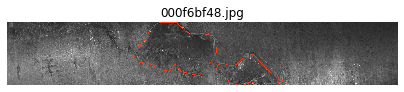

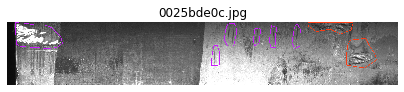

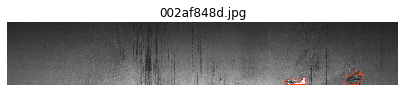

In [31]:
# class_4 defect sumple (red)
for idx in idx_class_4[:3]:
    show_mask_image(idx, contour=True)

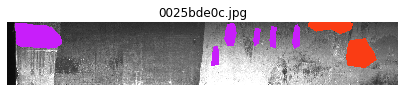

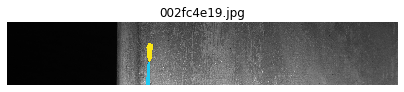

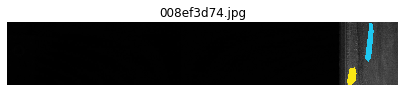

In [36]:
# contain multi class defects
for idx in idx_class_multi[:3]:
    show_mask_image(idx, contour=False)

In [12]:
gb = train_df.groupby('ImageId')

In [19]:
unique_image_ids = list(gb.groups.keys())

In [22]:
print('Total images:', len(unique_image_ids))

Total images: 12568


In [24]:
len(unique_image_ids) * 4 # each image has four entries

50272

In [9]:
train_df.head()

,ImageId,EncodedPixels,has_mask
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1,0
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1,0
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002...,1
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...,1
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...,1


In [59]:
train_df['has_mask'].value_counts()

1    8296
0    3286
Name: has_mask, dtype: int64